In [39]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [40]:
data1 = pd.read_csv('../stats_100_etfs.csv')
data = pd.read_csv('../hun_etfs.csv')
data

,date,open,high,low,close,volume,ticker
0,2015-01-05,204.17,204.37,201.35,201.72,169632646,SPY
1,2015-01-06,202.09,202.72,198.86,199.82,209151408,SPY
2,2015-01-07,201.42,202.72,200.88,202.31,125346709,SPY
3,2015-01-08,204.01,206.16,203.99,205.90,147217784,SPY
4,2015-01-09,206.40,206.42,203.51,204.25,158567288,SPY
...,...,...,...,...,...,...,...
125695,2019-12-24,22.82,22.82,22.77,22.78,2633089,BKLN
125696,2019-12-26,22.79,22.81,22.79,22.79,2999603,BKLN
125697,2019-12-27,22.79,22.80,22.78,22.79,2654723,BKLN
125698,2019-12-30,22.80,22.81,22.71,22.71,3697412,BKLN


In [41]:
df = data.loc[data['ticker'] == 'SPY']
df = df.set_index('date')
df

,open,high,low,close,volume,ticker
date,,,,,,
2015-01-05,204.17,204.37,201.35,201.72,169632646,SPY
2015-01-06,202.09,202.72,198.86,199.82,209151408,SPY
2015-01-07,201.42,202.72,200.88,202.31,125346709,SPY
2015-01-08,204.01,206.16,203.99,205.90,147217784,SPY
2015-01-09,206.40,206.42,203.51,204.25,158567288,SPY
...,...,...,...,...,...,...
2019-12-24,321.47,321.52,320.90,321.23,20270007,SPY
2019-12-26,321.65,322.95,321.64,322.94,31024188,SPY
2019-12-27,323.74,323.80,322.28,322.86,42554820,SPY


In [42]:
# from datetime import datetime
# df['date'] = pd.to_datetime(df['date'])

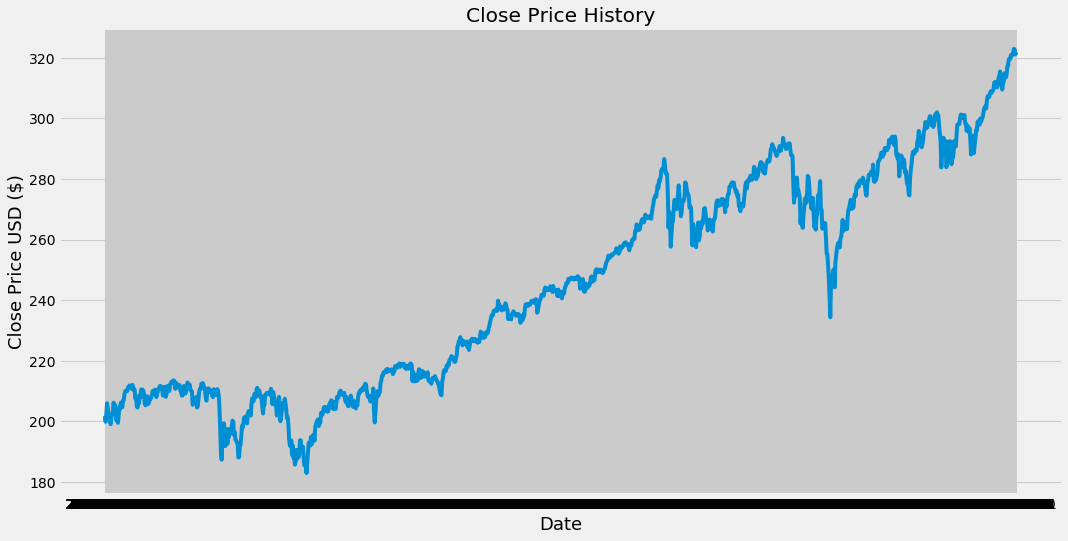

In [43]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.savefig('spy_closeprice.png')
plt.show()

In [44]:
#Create a new dataframe with only the 'Close column
data = df[['close']]
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .95 )

training_data_len

1195

In [45]:
dataset

array([[201.72],
       [199.82],
       [202.31],
       ...,
       [322.86],
       [321.08],
       [321.86]])

In [46]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.13463735],
       [0.12107367],
       [0.13884923],
       ...,
       [0.9994289 ],
       [0.98672187],
       [0.99229012]])

In [47]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
  x_train.append(train_data[i-30:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 31:
    print(x_train)
    print(y_train)
    print()

[array([0.13463735, 0.12107367, 0.13884923, 0.16447744, 0.15269846,
       0.14127641, 0.13720731, 0.128498  , 0.11536265, 0.13399486,
       0.13706453, 0.14434609, 0.1659052 , 0.15783838, 0.16126499,
       0.1419189 , 0.12335808, 0.13656482, 0.11843232, 0.13606511,
       0.15691034, 0.15134209, 0.16604797, 0.16197887, 0.15541119,
       0.17097373, 0.17183038, 0.18603655, 0.1921759 , 0.1945317 ])]
[0.1946744717304396]

[array([0.13463735, 0.12107367, 0.13884923, 0.16447744, 0.15269846,
       0.14127641, 0.13720731, 0.128498  , 0.11536265, 0.13399486,
       0.13706453, 0.14434609, 0.1659052 , 0.15783838, 0.16126499,
       0.1419189 , 0.12335808, 0.13656482, 0.11843232, 0.13606511,
       0.15691034, 0.15134209, 0.16604797, 0.16197887, 0.15541119,
       0.17097373, 0.17183038, 0.18603655, 0.1921759 , 0.1945317 ]), array([0.12107367, 0.13884923, 0.16447744, 0.15269846, 0.14127641,
       0.13720731, 0.128498  , 0.11536265, 0.13399486, 0.13706453,
       0.14434609, 0.1659052 , 0.1

In [48]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1165, 30, 1)

In [50]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [51]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
1165/1165 [==============================] - 90s 77ms/step - loss: 0.0028


In [53]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0])

In [54]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [55]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [56]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [57]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.2354341383002363

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


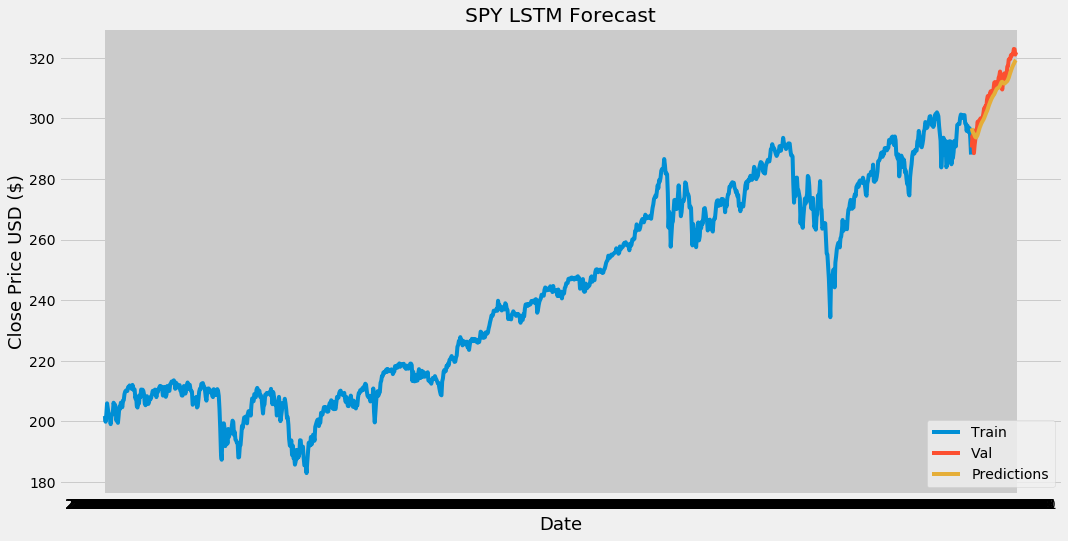

In [74]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('SPY LSTM Forecast')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('spy_lstm_forecast.png')
plt.show()

In [60]:
valid

,close,Predictions
date,,
2019-10-03,290.42,296.770233
2019-10-04,294.35,295.727753
2019-10-07,293.08,295.237762
2019-10-08,288.53,294.918243
2019-10-09,291.27,294.261261
...,...,...
2019-12-24,321.23,317.548462
2019-12-26,322.94,317.999298
2019-12-27,322.86,318.529572


In [70]:
valid['difference'] = valid['close'] - valid['Predictions']
valid['difference_pct'] = valid['difference']/valid['close']
valid['difference_pct'] = valid['difference_pct'].map("{:.2%}".format)
valid

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,close,Predictions,difference,difference_pct
date,,,,
2019-10-03,290.42,296.770233,-6.350233,-2.19%
2019-10-04,294.35,295.727753,-1.377753,-0.47%
2019-10-07,293.08,295.237762,-2.157762,-0.74%
2019-10-08,288.53,294.918243,-6.388243,-2.21%
2019-10-09,291.27,294.261261,-2.991261,-1.03%
...,...,...,...,...
2019-12-24,321.23,317.548462,3.681538,1.15%
2019-12-26,322.94,317.999298,4.940702,1.53%
2019-12-27,322.86,318.529572,4.330428,1.34%


In [73]:
valid.to_csv('spy_predictions_lstm.csv')

In [75]:
# #Get the quote
# spy_quote = web.DataReader('SPY', data_source='yahoo', start='2019-11-27', end='2020-01-10')
# #Create a new dataframe
# new_df = spy_quote.filter(['Close'])
# #Get teh last 60 day closing price values and convert the dataframe to an array
# last_60_days = new_df[-60:].values
# #Scale the data to be values between 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# #Create an empty list
# X_test = []
# #Append teh past 60 days
# X_test.append(last_60_days_scaled)
# #Convert the X_test data set to a numpy array
# X_test = np.array(X_test)
# #Reshape the data
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# #Get the predicted scaled price
# pred_price = model.predict(X_test)
# #undo the scaling 
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)

In [76]:
# spy_quote2 = web.DataReader('SPY', data_source='yahoo', start='2019-11-27', end='2020-01-10')
# print(spy_quote2['Close'])